In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [7]:
# Define the model architecture
class Model(nn.Module):
    def __init__(self, input_size=1, hidden_sizes=[5, 10, 10, 10, 10, 10, 5], output_size=1):
        super(Model, self).__init__()
        layers = [nn.Linear(input_size, hidden_sizes[0])]
        layers += [nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]) for i in range(len(hidden_sizes) - 1)]
        layers.append(nn.Linear(hidden_sizes[-1], output_size))
        self.layers = nn.ModuleList(layers)

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.relu(layer(x))
        x = self.layers[-1](x)  # No activation on the output layer
        return x


In [8]:
# Data generation
X = torch.linspace(-1, 1, 200).unsqueeze(-1)
y = torch.sin(5 * torch.pi * X) / (5 * torch.pi * X)

# Initialize the model, loss function, and optimizer
model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [9]:
# Training function
def train(model, criterion, optimizer, X, y, epochs=2000):
    model.train()
    losses = []
    grad_norms = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        grad_norm = sum(p.grad.norm().item() ** 2 for p in model.parameters() if p.grad is not None) ** 0.5
        grad_norms.append(grad_norm)

    return losses, grad_norms

losses, grad_norms = train(model, criterion, optimizer, X, y)


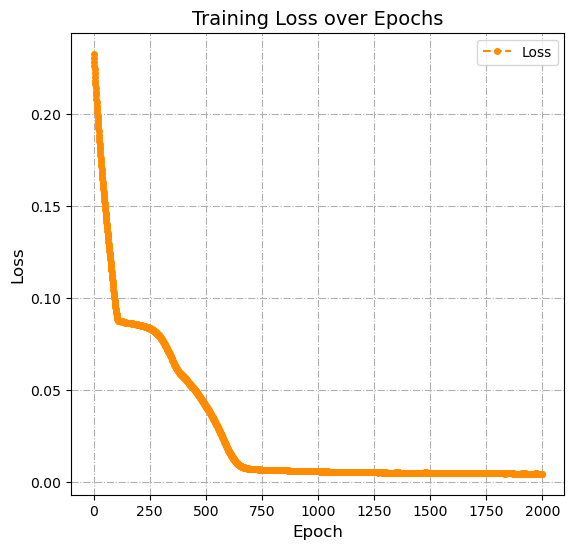

In [10]:
# Visualization enhancements
plt.figure(figsize=(14, 6))

# Plot for Training Loss
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss', color='darkorange', linestyle='--', marker='o', markersize=4)
plt.title("Training Loss over Epochs", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.grid(True, linestyle='-.')
plt.legend()

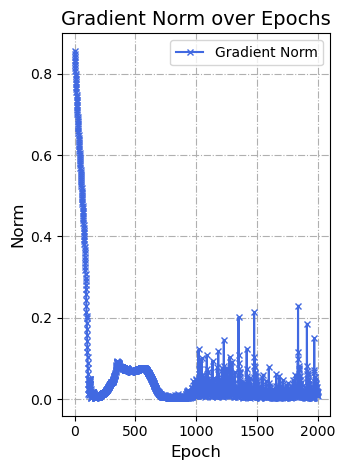

In [11]:
# Plot for Gradient Norm
plt.subplot(1, 2, 2)
plt.plot(grad_norms, label='Gradient Norm', color='royalblue', linestyle='-', marker='x', markersize=4)
plt.title("Gradient Norm over Epochs", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Norm", fontsize=12)
plt.grid(True, linestyle='-.')
plt.legend()

plt.tight_layout()
plt.show()